## Task 4 SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [4]:
data = pd.read_csv('heart_disease.csv') #reading or importing the csv file
hrt_dis = pd.DataFrame(data) # coverting the data into a Dataframe
hrt_dis.head() # now displaying the first 5 samples

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### How many Categorical variables in the dataset?

In [5]:
hrt_dis.info() #there is no categorical variable since all features have quantitative data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [6]:
# first gettting the series of all features total missing values
series_of_missing_values = hrt_dis.isna().sum()

# now summing the series to get the total missing value in the dataset
print('The total number of missing values in the dataset are',series_of_missing_values.sum())

The total number of missing values in the dataset are 645


### Bonus: Visual representation of missing values

<AxesSubplot:>

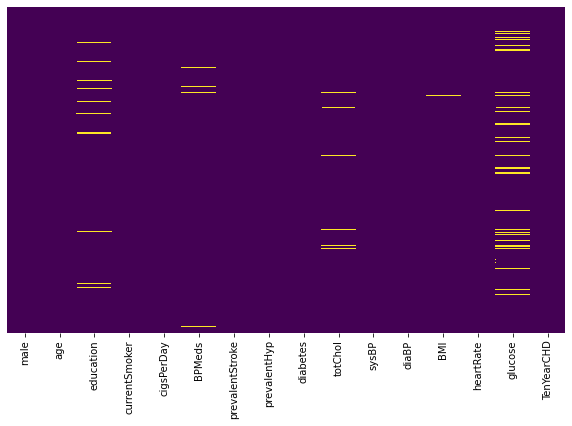

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(hrt_dis.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [10]:
# imports..
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [11]:
# creating simpleimputer object
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

### Split data into dependent (y) and independent (X) variables 
Hint: TenYearCHD is the target

In [80]:
# spliting the input varaiable(x) and the target variable(y)
X = hrt_dis.loc[:,['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

# now subseting the target (y)
y = hrt_dis['TenYearCHD']


### Fit the imputer model on dataset to calculate statistic for each column

In [81]:
imp.fit(hrt_dis)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [82]:
imp.transform(hrt_dis)

array([[  1.        ,  39.        ,   4.        , ...,  80.        ,
         77.        ,   0.        ],
       [  0.        ,  46.        ,   2.        , ...,  95.        ,
         76.        ,   0.        ],
       [  1.        ,  48.        ,   1.        , ...,  75.        ,
         70.        ,   0.        ],
       ...,
       [  0.        ,  48.        ,   2.        , ...,  84.        ,
         86.        ,   0.        ],
       [  0.        ,  44.        ,   1.        , ...,  86.        ,
         81.96675325,   0.        ],
       [  0.        ,  52.        ,   2.        , ...,  80.        ,
        107.        ,   0.        ]])

### Sanity Check: Whether missing values are filled or not

In [112]:
hrt_dis.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Let's try to visualize the missing values.
##### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [84]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

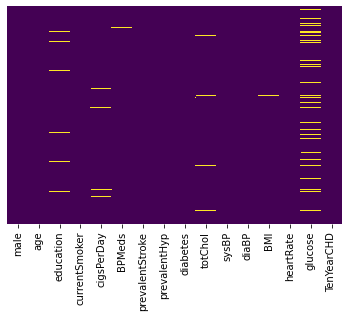

In [85]:
sns.heatmap(hrt_dis.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Split the dataset into train and test data

In [109]:
# importing model selection from skit learn
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X, y,train_size=0.5,test_size=0.5,random_state=123) 


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [94]:
imp.fit(train_X)
imp.fit(test_X)
#imp.fit(train_y)

xnumpy = imp.transform(train_X)
xtestnum = imp.transform(test_X)
#ynumpy = imp.transform(train_y)

# converting numpy to dataframe
Xdf = pd.DataFrame(xnumpy)
testx = pd.DataFrame(xtestnum)
#ydf = pd.DataFrame(ynumpy)
#ydf1d.shape


### Create a Logistic Regression model

In [95]:
# creating my model
#first importing the model from sklearn
from sklearn.linear_model import LogisticRegression

# now creating an object for the model
myLogModel = LogisticRegression(penalty='l2',C=.01)

### Train the model

In [96]:
myLogModel.fit(Xdf,train_y)

/Users/isaacopei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

### Apply the model

In [111]:
myLogModel.predict(testx)

array([0, 0, 0, ..., 0, 0, 0])

### Find how well the trained model did with testing data

In [110]:
myLogModel.score(testx,test_y)

0.8386031146767343

### Any observations? 

In [ ]:
# I observed that accuracy model did very well by getting an accuracy of 83%